## Import Dependencies

In [32]:
import torch
from fcgan import Generator, Discriminator
from utils import train_fcgan
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math

# fcGAN on MNIST Data

## Data Analysis

In [45]:
# GANs are sensitive to Hyperparams
# Hyperparameters
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 3e-4  # best lr for Adam given by andrew karpathy
z_dimension = 128 #64,128,256
image_dim = 28*28*1
batch_size = 32
num_epochs = 100
print(device,torch.cuda.get_device_name(0))

cuda NVIDIA RTX A4000


In [ ]:
# Dataset and loader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])
dataset = datasets.MNIST(root='./data/', transform=transform, download=True)
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

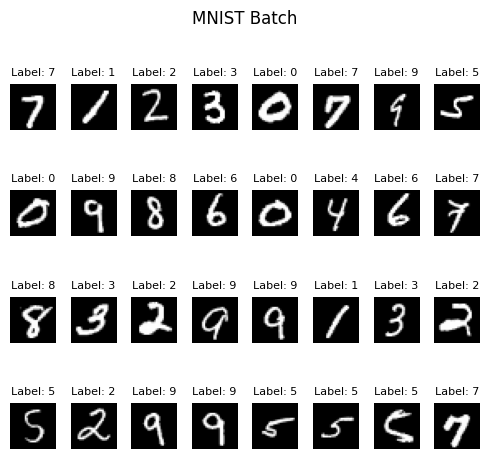

In [ ]:
# fetch the first batch
data_iter = iter(loader)
images, labels = next(data_iter)

# undo normalization 
images = images * 0.5 + 0.5  # Convert back to [0, 1] range

# plot the images in a square-like grid
fig, axes = plt.subplots(4, 8, figsize=(5,5))
axes = axes.flatten()  # flatten to easily iterate

# display each image with label
for i in range(loader.batch_size):
    axes[i].imshow(images[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {labels[i].item()}", fontsize=8)
    axes[i].axis("off")

# # hide any unused subplots
# for i in range(loader.batch_size, grid_size * grid_size):
#     fig.delaxes(axes[i])

plt.suptitle('MNIST Batch')
plt.tight_layout()
plt.show()

In [ ]:
print(f'Image Dimension: {dataset[0][0].shape}')

In [ ]:
# Model initialization
discriminator = Discriminator(image_dimension=image_dim).to(device)
generator = Generator(z_dimension=z_dimension, image_dimension=image_dim).to(device)

In [6]:
# Training
lossD_list, lossG_list = train_fcgan(generator, discriminator, loader, device, num_epochs, z_dimension, lr)

Epoch [0/10] Batch 0/1875 Loss D: 0.6736, loss G: 0.7260
Epoch [1/10] Batch 0/1875 Loss D: 0.4280, loss G: 1.9911
Epoch [2/10] Batch 0/1875 Loss D: 0.4812, loss G: 2.2235
Epoch [3/10] Batch 0/1875 Loss D: 0.7610, loss G: 1.0393
Epoch [4/10] Batch 0/1875 Loss D: 0.2361, loss G: 2.2081
Epoch [5/10] Batch 0/1875 Loss D: 0.3543, loss G: 2.3744
Epoch [6/10] Batch 0/1875 Loss D: 0.4053, loss G: 1.6880
Epoch [7/10] Batch 0/1875 Loss D: 0.5154, loss G: 2.0064
Epoch [8/10] Batch 0/1875 Loss D: 0.4758, loss G: 1.3865
Epoch [9/10] Batch 0/1875 Loss D: 0.5397, loss G: 1.9832


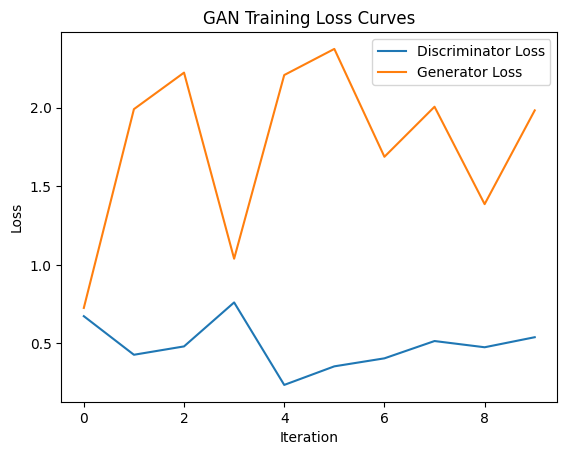

In [7]:
# Plotting loss curves
plt.figure()
plt.plot(lossD_list, label="Discriminator Loss")
plt.plot(lossG_list, label="Generator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("GAN Training Loss Curves")
plt.show()

## Changes that may improve results

As we know that simple GANs are sensitive to hyperparameters, there are some changes that may significantly affect model performance:

1) Using larger network
2) Better normalization with BatchNorm
3) Different learning rate
4) Change of architecture to DCGAN

In [8]:
# import torch
# from gan import Generator, Discriminator
# from utils import train_fcgan
# from torch.utils.data import DataLoader
# import torchvision.datasets as datasets
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt


# # Model initialization
# discriminator = Discriminator(image_dimension=image_dim).to(device)
# generator = Generator(z_dimension=z_dimension, image_dimension=image_dim).to(device)

# # Dataset and loader
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
# ])
# dataset = datasets.MNIST(root='./data/', transform=transform, download=True)
# loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

# # Training
# lossD_list, lossG_list = train_fcgan(generator, discriminator, loader, device, num_epochs, z_dimension, lr)

# # Plotting loss curves
# plt.figure()
# plt.plot(lossD_list, label="Discriminator Loss")
# plt.plot(lossG_list, label="Generator Loss")
# plt.xlabel("Iteration")
# plt.ylabel("Loss")
# plt.legend()
# plt.title("GAN Training Loss Curves")
# plt.show()
